In [1]:
from astropy.io import fits

file_path = r'D:\AI\docker_models\Ubuntu-Sextractor\config\SH8902SHI61001.fits'
with fits.open(file_path) as hdul:
    print(f"文件中包含的 HDU 数量: {len(hdul)}")

文件中包含的 HDU 数量: 1


In [2]:
from astropy.io import fits

file_path = r'D:\AI\docker_models\Ubuntu-Sextractor\config\SH8902SHI61001.fits'
with fits.open(file_path) as hdul:
    header = hdul[0].header 
    for key in ['CTYPE1', 'CTYPE2', 'CRVAL1', 'CRVAL2', 'CRPIX1', 'CRPIX2', 'CDELT1', 'CDELT2']:
        if key in header:
            print(f"{key}: {header[key]}")
        else:
            print(f"{key}: 未找到")

CTYPE1: 未找到
CTYPE2: 未找到
CRVAL1: 未找到
CRVAL2: 未找到
CRPIX1: 未找到
CRPIX2: 未找到
CDELT1: 未找到
CDELT2: 未找到


In [3]:
header['CTYPE1'] = 'RA---TAN'  
header['CTYPE2'] = 'DEC--TAN'  
header['CRVAL1'] = 180.0  
header['CRVAL2'] = 0.0 
header['CRPIX1'] = 10080.0 
header['CRPIX2'] = 9300.0  
header['CDELT1'] = -0.00027778 
header['CDELT2'] = 0.00027778 

In [4]:
from astropy.io import fits

file_path = r'D:\AI\docker_models\Ubuntu-Sextractor\config\SH8902SHI61001.fits'
with fits.open(file_path) as hdul:
    for i, hdu in enumerate(hdul):
        print(f"HDU {i}:")
        print(hdu.header) 

HDU 0:
SIMPLE  =                    T /FITS STANDARD                                   BITPIX  =                   16 /FITS BITS/PIXEL                                 NAXIS   =                    2 /NUMBER OF AXES                                  NAXIS1  =                20160                                                  NAXIS2  =                18600                                                  OBSERVAT= 'Shao    '           / Observatory site                               TELESCOP= '156     '           / Same as APERTURE in centimeter                 SZ_PLA  = '-999    '           / Plate size in centimeter                       CD_PLA  = 'SHI61   '           / Plate number                                   QUA_PLA = '1       '           / Plate quality                                  OBJECT  = '-999    '           / Object                                         DATE_O  = '1989-10-31'         / Observation date                               START_O = '-999    '           / 

In [5]:
from astropy.io import fits
from astropy.wcs import WCS

file_path = r'D:\AI\docker_models\Ubuntu-Sextractor\config\SH8902SHI61001.fits'

with fits.open(file_path) as hdul:
    data = hdul[0].data  
    header = hdul[0].header 

    if 'CTYPE1' not in header:
        header['CTYPE1'] = 'RA---TAN'  
    if 'CTYPE2' not in header:
        header['CTYPE2'] = 'DEC--TAN' 
    if 'CRVAL1' not in header:
        header['CRVAL1'] = 180.0  
    if 'CRVAL2' not in header:
        header['CRVAL2'] = 0.0 
    if 'CRPIX1' not in header:
        header['CRPIX1'] = 10080.0  
    if 'CRPIX2' not in header:
        header['CRPIX2'] = 9300.0 
    if 'CDELT1' not in header:
        header['CDELT1'] = -0.00027778 
    if 'CDELT2' not in header:
        header['CDELT2'] = 0.00027778  

    wcs = WCS(header)

    naxis1 = header['NAXIS1'] 
    naxis2 = header['NAXIS2'] 

    corners_pixel = [
        [0, 0],  
        [naxis1 - 1, 0],  
        [naxis1 - 1, naxis2 - 1], 
        [0, naxis2 - 1] 
    ]

    corners_sky = wcs.all_pix2world(corners_pixel, 0)

    ra_min = min(corners_sky[:, 0])
    ra_max = max(corners_sky[:, 0])
    dec_min = min(corners_sky[:, 1])
    dec_max = max(corners_sky[:, 1])

    print(f"赤经范围: {ra_min:.6f} 到 {ra_max:.6f} 度")
    print(f"赤纬范围: {dec_min:.6f} 到 {dec_max:.6f} 度")

赤经范围: 177.202203 到 182.797519 度
赤纬范围: -2.578256 到 2.578533 度


In [6]:
from astropy.io import fits
from astropy.wcs import WCS

fits_path = r'D:\AI\docker_models\Ubuntu-Sextractor\config\SH8902SHI61001.fits'  
with fits.open(fits_path) as hdul:
    data = hdul[0].data  
    header = hdul[0].header  

header['CTYPE1'] = 'RA---TAN'  
header['CTYPE2'] = 'DEC--TAN' 
header['CRVAL1'] = 180.0  
header['CRVAL2'] = 0.0  
header['CRPIX1'] = 10080.0 
header['CRPIX2'] = 9300.0  
header['CDELT1'] = -0.00027778  
header['CDELT2'] = 0.00027778  

wcs = WCS(header)

header.update(wcs.to_header())

new_fits_path = 'image_with_wcs_shao.fits'
with fits.open(fits_path) as hdul:
    hdul[0].header = header
    hdul.writeto(new_fits_path, overwrite=True)
print(f"WCS 信息已补充并保存到 {new_fits_path}")

WCS 信息已补充并保存到 image_with_wcs_shao.fits


In [7]:
from astropy.io.votable import parse
import pandas as pd

vot_file_path = r'D:\AI\study1\1736690136539O-result.vot\1736690136539O-result.vot' 
csv_file_path = 'gaia_catalog_shao.csv' 
votable = parse(vot_file_path)

table = votable.get_first_table()

df = table.to_table().to_pandas()

df.to_csv(csv_file_path, index=False)
print(f"文件已转换为 {csv_file_path}")

文件已转换为 gaia_catalog_shao.csv


In [8]:
import pandas as pd

csv_file_path = 'gaia_catalog_shao.csv'  
df = pd.read_csv(csv_file_path)

print("CSV 文件列名:", df.columns)

ra_column = 'ra' 
dec_column = 'dec'  

ra_min = df[ra_column].min()
ra_max = df[ra_column].max()
dec_min = df[dec_column].min()
dec_max = df[dec_column].max()

print(f"赤经范围: {ra_min:.6f} 到 {ra_max:.6f} 度")
print(f"赤纬范围: {dec_min:.6f} 到 {dec_max:.6f} 度")

CSV 文件列名: Index(['SOURCE_ID', 'ra', 'dec', 'parallax', 'pmra', 'pmdec',
       'phot_g_mean_mag'],
      dtype='object')
赤经范围: 177.202234 到 182.797503 度
赤纬范围: -2.578249 到 2.578418 度


In [9]:
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

fits_path = r'D:\AI\study1\image_with_wcs_shao.fits'  
gaia_csv_path = r'D:\AI\study1\gaia_catalog_shao.csv'  
sextractor_cat_path = r'D:\AI\study1\shao1.cat'  
output_csv_path = 'matched_catalog_shao.csv' 

with fits.open(fits_path) as hdul:
    data = hdul[0].data  
    header = hdul[0].header 

header['CTYPE1'] = 'RA---TAN' 
header['CTYPE2'] = 'DEC--TAN'  
header['CRVAL1'] = 180.0  
header['CRVAL2'] = 0.0  
header['CRPIX1'] = 10080.0  
header['CRPIX2'] = 9300.0  
header['CDELT1'] = -0.00027778  
header['CDELT2'] = 0.00027778 

wcs = WCS(header)

header.update(wcs.to_header())

new_fits_path = 'image_with_wcs.fits'
with fits.open(fits_path) as hdul:
    hdul[0].header = header
    hdul.writeto(new_fits_path, overwrite=True)
print(f"WCS 信息已补充并保存到 {new_fits_path}")

gaia_df = pd.read_csv(gaia_csv_path)
print("Gaia 星表列名:", gaia_df.columns)

gaia_df['ra'] = pd.to_numeric(gaia_df['ra'], errors='coerce')
gaia_df['dec'] = pd.to_numeric(gaia_df['dec'], errors='coerce')

sextractor_df = pd.read_csv(sextractor_cat_path, delim_whitespace=True, comment='#', header=None)

num_columns = len(sextractor_df.columns)
if num_columns == 2:
    sextractor_df.columns = ['X_IMAGE', 'Y_IMAGE']
elif num_columns == 4:
    sextractor_df.columns = ['X_IMAGE', 'Y_IMAGE', 'FLUX', 'MAG']
else:
    raise ValueError(f"未知的列数: {num_columns}")

print("SExtractor 探测到的源:")
print(sextractor_df.head())

sextractor_coords = wcs.all_pix2world(sextractor_df[['X_IMAGE', 'Y_IMAGE']], 0)
sextractor_df['RA'] = sextractor_coords[:, 0]
sextractor_df['DEC'] = sextractor_coords[:, 1]
print("SExtractor 探测到的源的天球坐标:")
print(sextractor_df[['RA', 'DEC']].head())

gaia_coords = SkyCoord(ra=gaia_df['ra'].values * u.degree, dec=gaia_df['dec'].values * u.degree)
sextractor_coords = SkyCoord(ra=sextractor_df['RA'].values * u.degree, dec=sextractor_df['DEC'].values * u.degree)

max_separation = 5 * u.arcsec 
idx, d2d, _ = sextractor_coords.match_to_catalog_sky(gaia_coords)

sextractor_df['MATCHED'] = (d2d < max_separation).astype(int) 

print("匹配结果:")
print(sextractor_df[['X_IMAGE', 'Y_IMAGE', 'MATCHED']].head())

sextractor_df[['X_IMAGE', 'Y_IMAGE', 'MATCHED']].to_csv(output_csv_path, index=False)
print(f"匹配结果已保存到 {output_csv_path}")

WCS 信息已补充并保存到 image_with_wcs.fits
Gaia 星表列名: Index(['SOURCE_ID', 'ra', 'dec', 'parallax', 'pmra', 'pmdec',
       'phot_g_mean_mag'],
      dtype='object')


C:\Users\mapleLWG\AppData\Local\Temp\ipykernel_29956\385380710.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sextractor_df = pd.read_csv(sextractor_cat_path, delim_whitespace=True, comment='#', header=None)


SExtractor 探测到的源:
      X_IMAGE  Y_IMAGE
0   7331.4233  89.6331
1  14045.5039  92.0181
2   6795.6030  90.6179
3  10230.3350  92.6703
4   9996.7910  91.4844
SExtractor 探测到的源的天球坐标:
           RA       DEC
0  180.763177 -2.556254
1  178.898320 -2.555347
2  180.911985 -2.555884
3  179.957962 -2.555637
4  180.022836 -2.555967
匹配结果:
      X_IMAGE  Y_IMAGE  MATCHED
0   7331.4233  89.6331        0
1  14045.5039  92.0181        0
2   6795.6030  90.6179        0
3  10230.3350  92.6703        0
4   9996.7910  91.4844        0
匹配结果已保存到 matched_catalog_shao.csv


In [10]:
import pandas as pd

matched_csv_path = r'matched_catalog_shao.csv' 
matched_df = pd.read_csv(matched_csv_path)

print("匹配文件的列名:", matched_df.columns)

match_column = 'MATCHED'  
if match_column not in matched_df.columns:
    raise KeyError(f"列名 '{match_column}' 不存在。请检查匹配文件的列名。")

true_positives = matched_df[match_column].sum() 
false_positives = len(matched_df) - true_positives  

print(f"真值数量 (True Positives): {true_positives}")
print(f"假值数量 (False Positives): {false_positives}")

匹配文件的列名: Index(['X_IMAGE', 'Y_IMAGE', 'MATCHED'], dtype='object')
真值数量 (True Positives): 11580
假值数量 (False Positives): 509169


In [11]:
from astropy.io import fits
import numpy as np

fits_image = fits.open(r'D:\AI\docker_models\Ubuntu-Sextractor\config\SH8902SHI61001.fits')
data = fits_image[0].data

catalog = np.loadtxt(r'D:\AI\study1\matched_catalog_shao.csv', delimiter=',', skiprows=1) 
x_positions = catalog[:, 0] 
y_positions = catalog[:, 1]  
labels = catalog[:, 2]  

def pad_patch(patch, patch_size):
    if patch.shape[0] < patch_size or patch.shape[1] < patch_size:
        pad_width = ((0, patch_size - patch.shape[0]), (0, patch_size - patch.shape[1]))
        patch = np.pad(patch, pad_width, mode='constant', constant_values=0)
    return patch

patch_size = 8 
patches = []
for x, y in zip(x_positions, y_positions):
    x = int(round(x))  
    y = int(round(y))
    patch = data[y - patch_size//2:y + patch_size//2,
                 x - patch_size//2:x + patch_size//2]
    patch = pad_patch(patch, patch_size)  
    patches.append(patch)

patches = np.array(patches)
print("提取到的图像块数量:", len(patches))
print("每个图像块的形状:", patches[0].shape)

提取到的图像块数量: 520749
每个图像块的形状: (8, 8)


In [12]:
patches = patches / 255.0

from skimage.transform import resize
patches_resized = np.array([resize(patch, (patch_size, patch_size)) for patch in patches])

patches_resized = np.expand_dims(patches_resized, axis=-1) 

In [13]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 2 * 2, 128)  
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 2 * 2) 
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [14]:
from torch.utils.data import DataLoader, TensorDataset

patches_tensor = torch.tensor(patches, dtype=torch.float32).unsqueeze(1)  
labels_tensor = torch.tensor(labels, dtype=torch.long)

dataset = TensorDataset(patches_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [15]:
import torch.optim as optim

model = SimpleCNN(num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [16]:
print("标签的最大值:", labels.max().item())
print("标签的最小值:", labels.min().item())

标签的最大值: 1.0
标签的最小值: 0.0


Epoch [1/20], Loss: 0.1425, Learning Rate: 0.100000
Epoch [2/20], Loss: 0.1078, Learning Rate: 0.100000
Epoch [3/20], Loss: 0.1079, Learning Rate: 0.100000
Epoch [4/20], Loss: 0.1079, Learning Rate: 0.100000
Epoch [5/20], Loss: 0.1079, Learning Rate: 0.010000
Epoch [6/20], Loss: 0.1067, Learning Rate: 0.010000
Epoch [7/20], Loss: 0.1068, Learning Rate: 0.010000
Epoch [8/20], Loss: 0.1068, Learning Rate: 0.010000
Epoch [9/20], Loss: 0.1067, Learning Rate: 0.010000
Epoch [10/20], Loss: 0.1068, Learning Rate: 0.001000
Epoch [11/20], Loss: 0.1066, Learning Rate: 0.001000
Epoch [12/20], Loss: 0.1066, Learning Rate: 0.001000
Epoch [13/20], Loss: 0.1066, Learning Rate: 0.001000
Epoch [14/20], Loss: 0.1067, Learning Rate: 0.001000
Epoch [15/20], Loss: 0.1066, Learning Rate: 0.000100
Epoch [16/20], Loss: 0.1066, Learning Rate: 0.000100
Epoch [17/20], Loss: 0.1066, Learning Rate: 0.000100
Epoch [18/20], Loss: 0.1066, Learning Rate: 0.000100
Epoch [19/20], Loss: 0.1066, Learning Rate: 0.000100
Ep

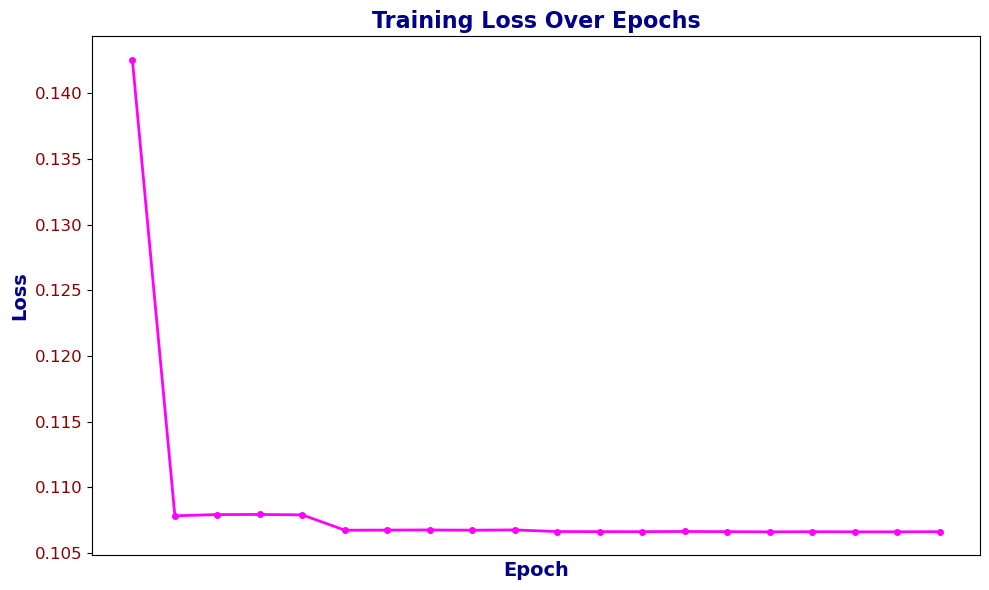

In [17]:
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.1) 

num_epochs = 20
epoch_losses = []  
plt.figure(figsize=(10, 6))

for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_avg_loss = running_loss / len(dataloader)
    epoch_losses.append(epoch_avg_loss)  
    
    scheduler.step()
    
    current_lr = optimizer.param_groups[0]['lr']
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_avg_loss:.4f}, Learning Rate: {current_lr:.6f}')

plt.plot(epoch_losses, marker='o', linestyle='-', color='magenta', linewidth=2, markersize=4) 
plt.title('Training Loss Over Epochs', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Epoch', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Loss', fontsize=14, fontweight='bold', color='darkblue')
plt.grid(False) 
plt.xticks([]) 
plt.yticks(fontsize=12, color='darkred')  
plt.tight_layout()  
plt.show()

In [ ]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')

Accuracy of the model on the test dataset: 97.78%


: 